
<img src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" />

# TutorialScikit learn (Sklearn)

<div style="text-align: right">
   Autores: Daniela Moctezuma, Mario Graff, Sabino Miranda, Eric S. Tellez
</div>

# Introducción
Es una biblioteca de código abierto con una gran variedad de métodos de aprendizaje computacional. Es parte fundamental del ecosistema de Ciencia de Datos para Python.

Para mostrar este tema se utilizarán los datos del titanic, pero con las variables categóricas codificadas.

In [90]:
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
data_train = pd.read_csv('Titanic_codificado_train.csv') 
data_test = pd.read_csv('Titanic_codificado_test.csv')

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']


num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)


In [2]:
data_train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,0,1,0,3,1,4,1,0,0,7,100,19
1,1,2,1,1,0,0,1,0,3,2,182,20
2,2,3,1,3,0,7,0,0,0,7,329,16
3,3,4,1,1,0,7,1,0,3,2,267,20
4,4,5,0,3,1,7,0,0,1,7,15,19


### Suele ser muy útil ver como se distribuyen las variables; con pandas podemos hacerlo facilmente

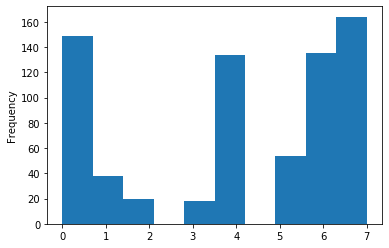

In [67]:
X_train['Age'].plot.hist()

### Versiones suavisadas también son muy útiles

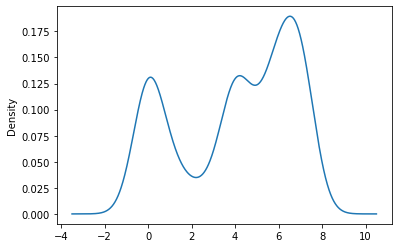

In [68]:
X_train['Age'].plot.kde()

### Correlación entre variables

In [69]:
X_train.corr()

,Unnamed: 0,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
Unnamed: 0,1.000000,-0.002035,0.038855,0.015617,-0.034268,0.030797,-0.019620,-0.013237,-0.046251,-0.001153
Pclass,-0.002035,1.000000,0.128124,0.215222,0.092372,0.017221,-0.655222,0.741710,0.037036,0.026667
Sex,0.038855,0.128124,1.000000,0.047191,-0.123788,-0.263530,-0.196519,0.112505,0.043922,0.146023
Age,0.015617,0.215222,0.047191,1.000000,-0.072395,-0.229829,-0.236930,0.183752,0.061667,0.191360
SibSp,-0.034268,0.092372,-0.123788,-0.072395,1.000000,0.409810,0.351411,0.042893,-0.013290,-0.190468
Parch,0.030797,0.017221,-0.263530,-0.229829,0.409810,1.000000,0.366818,-0.023749,-0.051012,-0.148811
Fare,-0.019620,-0.655222,-0.196519,-0.236930,0.351411,0.366818,1.000000,-0.511658,-0.056268,-0.093821
Cabin,-0.013237,0.741710,0.112505,0.183752,0.042893,-0.023749,-0.511658,1.000000,0.051257,0.073990
Lname,-0.046251,0.037036,0.043922,0.061667,-0.013290,-0.051012,-0.056268,0.051257,1.000000,-0.028609
NamePrefix,-0.001153,0.026667,0.146023,0.191360,-0.190468,-0.148811,-0.093821,0.073990,-0.028609,1.000000


### Gráficamente

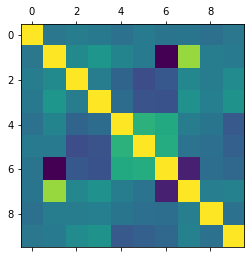

In [70]:
from matplotlib import pyplot as plt
plt.matshow(X_train.corr())

# Clustering

La tarea de  agrupamiento (conocida comunmente como _clustering_) consiste en encontrar grupos cuyos elementos tengan algo en común; y por tanto, nos permiten aprender particularidades, muchas veces por medio de visualizaciones.

Desde el punto de vista del un usuario de los métodos, existen dos tipos de algoritmos de agrupamiento que son muy utilizados:
- Aquellos donde al aplicarlos se obtiene un conjunto pequeño que representa el comportamiento general del conjunto de datos
- Aquellos donde al aplicarlos se obtiene la relación de densidad del conjunto de datos, o dicho de otra forma, una _fuerza de enlace_ entre sub-grupos.

Esta notebook nos enfocaremos en los primeros, y en particular, en el que probablemente es el más utilizado de los algoritmos de clustering, dado su alto desempeño: k-Means.

## Algoritmos de clustering más utilizados  
- k-Means
- Mapas autoorganizados
- Nearest Neighborhood  

## k-Means

- Aprendizaje no supevisado
- Técnica de agrupamiento con diversos parámetros
    - Número de clusters
    - Criterio de paro
    - Valores iniciales (semillas, normalmente se deja con selección aleatoria)
    


### Sketch del algoritmo k-Means

1. Toma como parámetro inicial el número de k, que es el número de clusters a generar
2. Selecciona k elementos de forma aleatoria, estos elementos son los centroides de cada cluster
3. A cada objeto (diferente de los centroides) se le asigna el cluster al que se parece más, esto en base a la distancia entre el objeto y el centroide (o media del cluster).
4. Se calcula el nuevo valor del centroide
5. Se itera del paso 3 al 4 hasta que no haya cambios en los valores de los centroides u otro criterio de paro.


## Medición de la similitud

- Normalmente se utiliza una medida basada en el error cuadrático o la distancia Euclidiana

$$ SSE = \sum^k_{i=1} \sum_{p \in C_i} || p - m_i ||^2$$

donde $m_i$ es el centroide del cluster $C_i$, y $k$ clusters.

- Distancia Euclideana para vectores $d$-dimensionales.

$$|| u - v || = \sqrt{\sum^d_i (u_i - v_i)^2 }$$


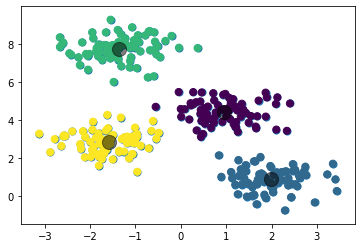

In [71]:
#Aquí creamos datos sintéticos para observar en un plot sus muestras y sus centroides.
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [72]:
#Aqui entrenamos un kmeans con los datos del titanic
kmeans_titanic = KMeans(n_clusters=2, random_state=0).fit(X_train)
#predecimos en test
kmeans_predicted = kmeans_titanic.predict(X_test)
#predecimos en train
kmeans_predicted_ = kmeans_titanic.predict(X_train)

### Exploración por variable

In [73]:
import numpy as np
#Aqui solo pasamos un dataframe a otro tipo de dato de array de numpy
X_train_ = np.array(X_train)

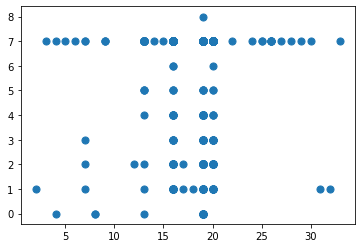

In [74]:
#Se plotea solo las variables 9 y 7
plt.scatter(X_train_[:, 9], X_train_[:, 7], s=50);


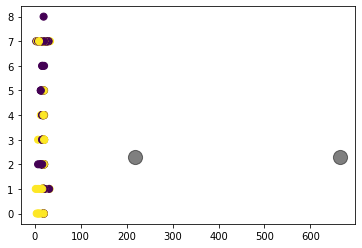

In [38]:
#graficamos los datos del kmeans con los dos centroides calculados, los datos son solo de las variables 
# 9 y 7, pero se entrenó con todas las variables por eso los centroides se ven muy alejados de los puntos.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)

plt.scatter(X_train_[:, 9], X_train_[:, 7], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [39]:
X_all.head()

,Unnamed: 0,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,0,3,1,4,1,0,0,7,100,19
1,1,1,0,0,1,0,3,2,182,20
2,2,3,0,7,0,0,0,7,329,16
3,3,1,0,7,1,0,3,2,267,20
4,4,3,1,7,0,0,1,7,15,19


In [40]:
X_ = data_train[['Cabin','NamePrefix']]
y_ = data_train['Survived']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

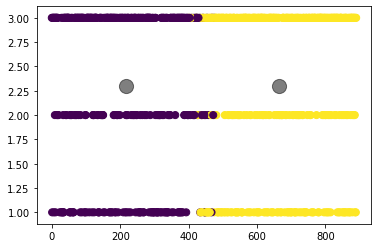

In [41]:
#Se vuelve a entrenar el k-means solo con los valores de las variables 9 y 7.

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)

plt.scatter(X_train_[:, 0], X_train_[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
# Ahora vemos como los centroides se paran realmente las dos clases, la negra y la amarilla.

### Visualización con PCA

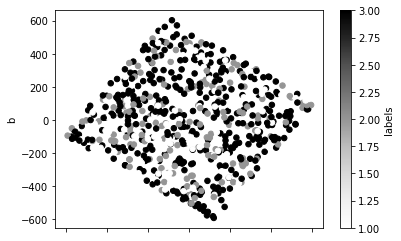

In [115]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
labels = X_train.Pclass
X_train_ = X_train.drop('Pclass', axis=1)
X = pd.DataFrame(data=pca.fit_transform(X_train_), columns=["a", "b"])
X["labels"] = labels.values
X.plot.scatter(x="a", y="b", c="labels", s=30)

# Ejercicios
- Cree un notebook de Jupyter
- Use pandas para leer el conjunto de datos `Titanic_codificado_train.csv`
- Use KMeans para generar un análisis de clusters
- Cree dos figuras, usando la transformación PCA
    - En la primera ponga colores diferentes a cada cluster de kmeans
    - En la segunda ponga colores diferentes a cada clase (indicada como Pclass en el dataset)
